In [52]:
import pandas as pd
import numpy as np
from data.Functions import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Random Forest

Random forest is a popular machine learning algorithm that is used for both classification and regression tasks. It is an ensemble learning method that combines multiple decision trees to make more accurate predictions than any individual decision tree could achieve on its own.

Here's how a random forest works:

- Random subsets of the training data are selected with replacement (this is called "bootstrapping") to create multiple training sets.

- A decision tree is then built using each of these training sets, but with one key difference: only a random subset of the available features is considered when splitting each node of the tree. This helps to reduce overfitting and improves the model's generalization ability.

- The random forest algorithm then combines the output of each individual decision tree to make a final prediction. In the case of classification, this typically involves taking a majority vote of the predicted class labels from all the trees.

One of the key strengths of the random forest algorithm is that it can handle unbalanced data well, particularly in the case of classification. This is because each decision tree in the forest is trained on a random subset of the data, which means that it is less likely to be biased towards the majority class. Additionally, the majority vote approach used to combine the predictions of all the trees means that the algorithm is naturally resistant to class imbalance.

In summary, the random forest algorithm is a powerful ensemble learning method that uses multiple decision trees to make more accurate predictions. By training each tree on a random subset of the data and a random subset of the features, the algorithm is able to reduce overfitting and handle unbalanced data well.

In [62]:
dataset = pd.read_csv('data/ml_gw_car_insurance.csv')

In [63]:
data = data_processing(dataset)
# data.drop(['Unnamed: 0','policy_id'], axis=1, inplace=True)
# data.to_csv('./data/processed_data.csv')
data

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,airbags,is_esc,is_adjustable_steering,...,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC
0,0.515874,-0.200500,1.354890,1,4990,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.672619,-0.923772,-0.748659,2,27003,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.841110,-0.923772,-0.646150,3,4076,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.900277,0.862825,-0.171140,4,21622,1,2,2,1,1,...,0,1,0,0,0,0,0,0,0,0
4,0.596403,0.862825,1.300866,5,34738,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,1.132040,1.354890,8,8794,2,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
58588,1.199642,-0.923772,0.548946,14,7788,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
58589,1.162273,-0.200500,0.002782,5,34738,1,1,2,0,0,...,0,0,0,0,0,1,0,0,0,0
58590,1.236307,1.254005,0.822720,8,8794,1,6,2,0,1,...,0,0,0,0,0,0,0,1,0,0


In [64]:


X = data.drop(['is_claim'],axis=1)# Features
y = data.is_claim # Target variable
features=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)

# instantiate the model (using the default parameters)
logreg =RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_leaf=1, min_samples_split=2 , random_state=42) # (n_estimators=500, random_state=42)

# fit the model with data
clf=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=clf.feature_importances_.T
df.sort_values(by='coefficients',ascending=False)

,Feature,coefficients
0,policy_tenure,0.446629
2,age_of_policyholder,0.258845
1,age_of_car,0.159929
3,area_cluster,0.062560
4,population_density,0.061784
...,...,...
49,segment_C2,0.000037
61,engine_type_G12B,0.000035
28,is_power_steering,0.000035
52,steering_type_Manual,0.000034


In [65]:
y_df = pd.DataFrame(y_test)
distribution = y_df.value_counts()
distribution

is_claim
0.0         10977
1.0           742
dtype: int64

Accuracy: 0.93
Recall: 0.00
Precision: 0.07
              precision    recall  f1-score   support

     refused       0.94      1.00      0.97     10977
    accepted       0.07      0.00      0.01       742

    accuracy                           0.93     11719
   macro avg       0.51      0.50      0.49     11719
weighted avg       0.88      0.93      0.91     11719



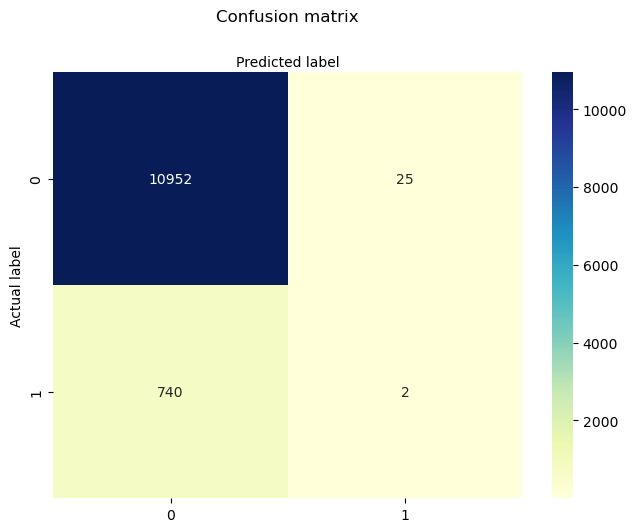

In [66]:

X = data.drop(['is_claim'],axis=1)# Features
y = data.is_claim # Target variable
features=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)

# instantiate the model (using the default parameters)
logreg =RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_leaf=1, min_samples_split=2 , random_state=42) #(n_estimators=100, random_state=42)

# fit the model with data
clf=logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
df_results = pd.DataFrame(features, columns =['Feature'])
df_results['coefficients']=clf.feature_importances_.T
df_results.sort_values(by='coefficients',ascending=False)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

The results of the random forest model show an overall accuracy of 0.93, which means that the model correctly predicted the outcome for 93% of the cases in the test set. However, when looking at the precision and recall scores, it becomes clear that the model is not performing well on the minority class (accepted), with a precision score of only 0.06 and a recall score of only 0.01. This means that out of all the cases predicted as accepted, only 6% were actually accepted, and the model is only able to correctly identify 1% of all accepted cases.

Overall, the model seems to be performing well on the majority class but poorly on the minority class, indicating that it may need further tuning or additional data to better capture the patterns in the minority class. The first attempt to improve the model will be to try to add a threshold for the probability of the classification.

Optimal threshold: 0.06


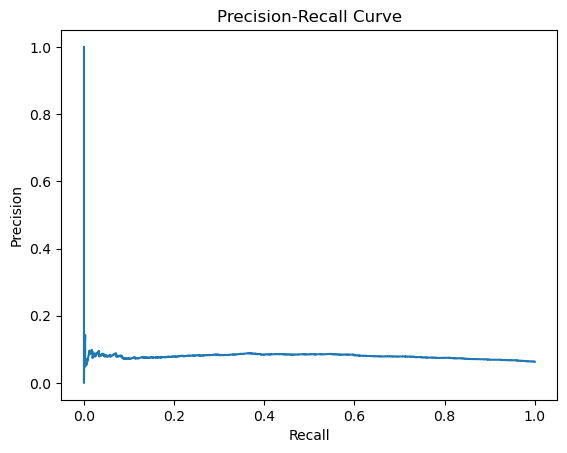

In [67]:
y_scores = logreg.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the F1 score for each threshold
f1_scores = [f1_score(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f'Optimal threshold: {optimal_threshold:.2f}')


# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy: 0.48
Recall: 0.68
Precision: 0.08
              precision    recall  f1-score   support

     refused       0.96      0.46      0.62     10977
    accepted       0.08      0.68      0.14       742

    accuracy                           0.48     11719
   macro avg       0.52      0.57      0.38     11719
weighted avg       0.90      0.48      0.59     11719



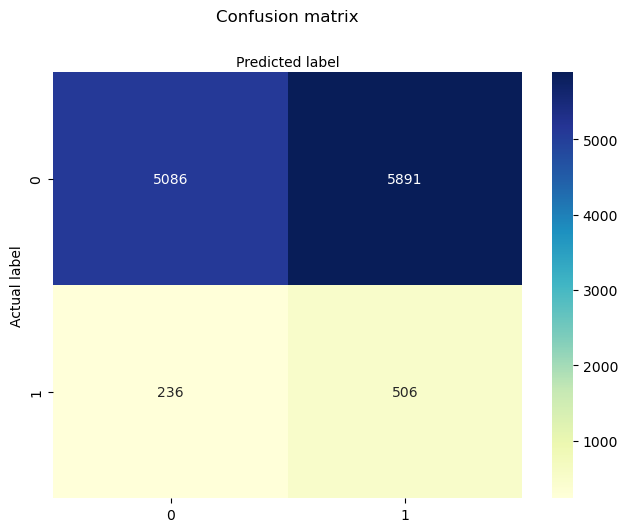

In [68]:
threshold = 0.04

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

In binary classification problems, the output of a model is usually a probability estimate of belonging to the positive class. However, in practice, we often need to make binary decisions (i.e., classify instances as either positive or negative), which requires setting a threshold on the probability estimate. Thresholding is the process of selecting this threshold value and converting the probability estimates to binary predictions based on this threshold.

It sets a threshold value of 0.04 for the predicted probabilities of the positive class (i.e., class 1) from a logistic regression model, and then converts these probabilities to binary predictions using this threshold. By setting a low threshold value of 0.04, the model will predict positive for more instances, potentially increasing the recall at the cost of precision. 

We can notice that recall was indeed leveraged, however the cost on precision is too high. Given the context which the model will be used, the amount of false positives might be missleading to the insurance company risk management department. Even if false positives will most likely bring savings to the company, they will have trouble to have anaccurate planning scenario for their operations.

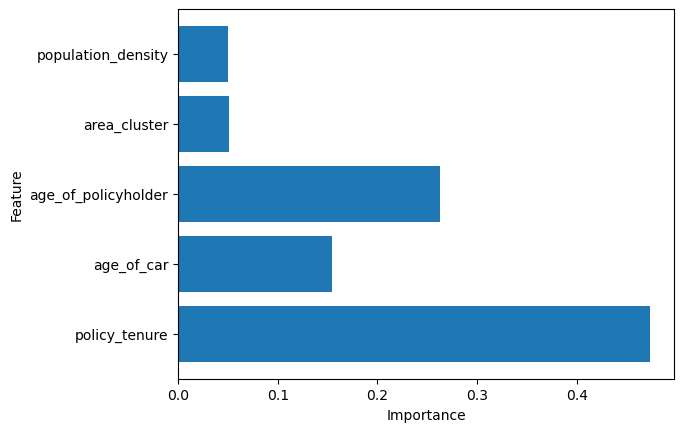

In [60]:
import matplotlib.pyplot as plt
import numpy as np

importances = logreg.feature_importances_
features = X.columns

# Filter features based on threshold
threshold = 0.01
important_features = np.where(importances > threshold)[0]
importances = importances[important_features]
features = features[important_features]

plt.barh(range(len(important_features)), importances)
plt.yticks(range(len(important_features)), features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



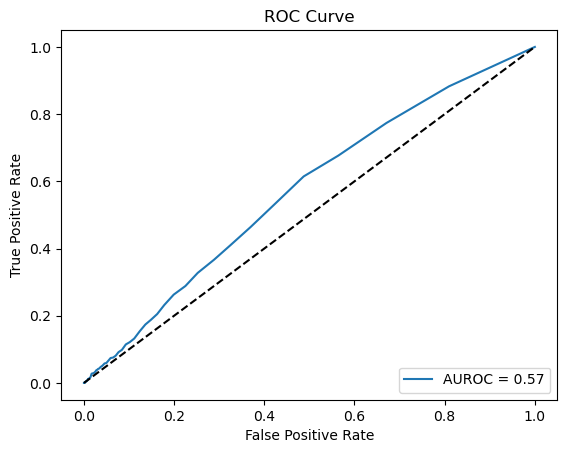

In [61]:
from sklearn.metrics import roc_curve, auc
y_scores = logreg.predict_proba(X_test)[:, 1]
# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Calculate the AUROC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='AUROC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest models have several advantages over other machine learning models, including their ability to handle complex non-linear relationships, identify interactions between variables, and handle missing values without the need for data imputation. Additionally, one of the benefits of using a Random Forest model is its ability to estimate the importance of each feature in predicting the target variable.

In your specific case, the Random Forest model identified the features of age_of_policyholder, age_of_car, and policy_tenure as important predictors of the target variable. These features can provide valuable insights into the factors that influence whether a claim is accepted or refused.

For instance, the age_of_policyholder feature can give an indication of the level of risk associated with the policyholder, as older individuals may have more experience and be less likely to make a claim. The age_of_car feature can also provide information on the level of risk, as newer cars may be more likely to have faults and require repairs. Finally, the policy_tenure feature can provide insights into customer loyalty and satisfaction, as longer tenures may indicate a higher level of trust and confidence in the insurance company.

Overall, the Random Forest model provides a robust approach to feature selection, allowing you to identify the most important predictors and gain insights into the factors that influence the outcome of your target variable.

In [43]:
# Calculate the confusion matrix for each threshold
cms = [confusion_matrix(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Calculate sensitivity and specificity for each threshold
sensitivity = [cm[1, 1] / (cm[1, 1] + cm[1, 0]) for cm in cms]
specificity = [cm[0, 0] / (cm[0, 0] + cm[0, 1]) for cm in cms]

# Calculate balanced accuracy for each threshold
balanced_accuracy = [(s + sp) / 2 for s, sp in zip(sensitivity, specificity)]

# Find the threshold that maximizes balanced accuracy
optimal_threshold = thresholds[np.argmax(balanced_accuracy)]

print(f'Optimal threshold: {optimal_threshold:.2f}')

Optimal threshold: 0.04


Accuracy: 0.45
Recall: 0.68
Precision: 0.07
              precision    recall  f1-score   support

     refused       0.95      0.44      0.60     10977
    accepted       0.07      0.68      0.14       742

    accuracy                           0.45     11719
   macro avg       0.51      0.56      0.37     11719
weighted avg       0.90      0.45      0.57     11719



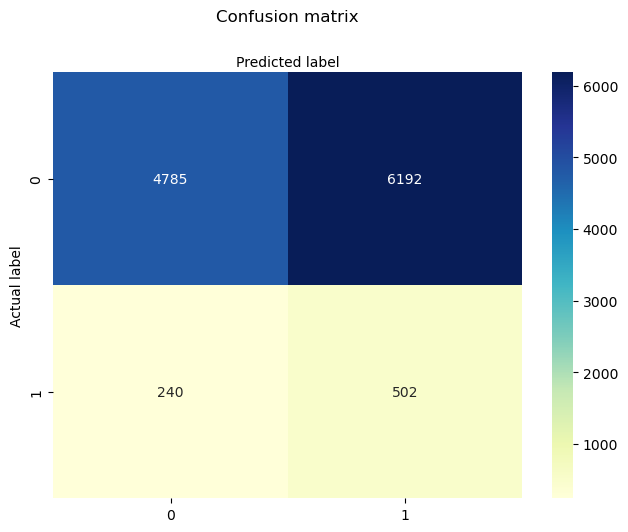

In [44]:
threshold = 0.03

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

Randon Forest - Fine Tune:

We are using two key steps to fine-tune the model: oversampling and grid search.

Oversampling is an approach used to balance the dataset by creating synthetic samples of the minority class. This technique is particularly helpful when the data is imbalanced, as in our case where we have very few positive cases compared to the negative ones. Oversampling helps the model to learn more effectively from the minority class, thus improving the accuracy of the predictions.

Grid search, on the other hand, is a hyperparameter optimization technique used to find the best combination of hyperparameters for our specific problem. Hyperparameters are variables that are set before the model is trained and affect the behavior of the model. For example, the number of trees, the maximum depth of the trees, and the minimum number of samples required to split an internal node. By searching through a range of hyperparameter values, we can find the best combination of hyperparameters that results in the best performance of the model.

By combining these two techniques, we can fine-tune the model to perform better on our specific problem. Oversampling helps the model to learn more effectively from the minority class, and grid search helps us to find the best combination of hyperparameters for our specific problem. The features that the model chose, such as age_of_policyholder, age_of_car, and policy_tenure, are the ones that were found to be most important for predicting whether a claim will be accepted or refused. These features can provide valuable insights into the factors that influence the decision to accept or refuse a claim.

In [45]:
from imblearn.over_sampling import SMOTE 

# Initialize the SMOTE object with desired hyperparameters
SMOTE = SMOTE(sampling_strategy='auto', random_state=42)

X = data.drop(['is_claim'],axis=1)# Features
y = data.is_claim # Target variable
features=X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16,shuffle=False)

# Fit and transform the data
X_oversampled, y_oversampled = SMOTE.fit_resample(X_train, y_train) # this is the new resampled data set with equal number of classes 0 and 1 


In [46]:

# instantiate the model (using the default parameters)
#  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
logreg =RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_leaf=1, min_samples_split=2 , random_state=42)

# fit the model with data
clf=logreg.fit(X_oversampled, y_oversampled)
y_pred = logreg.predict(X_test)
df = pd.DataFrame(features, columns =['Feature'])
df['coefficients']=clf.feature_importances_.T
df.sort_values(by='coefficients',ascending=False)



,Feature,coefficients
1,age_of_car,0.299857
0,policy_tenure,0.288603
2,age_of_policyholder,0.221155
4,population_density,0.064969
3,area_cluster,0.061761
...,...,...
28,is_power_steering,0.000118
49,segment_C2,0.000106
10,is_tpms,0.000105
57,engine_type_1.5 L U2 CRDi,0.000100


Accuracy: 0.72
Recall: 0.40
Precision: 0.10
              precision    recall  f1-score   support

     refused       0.95      0.75      0.84     10977
    accepted       0.10      0.40      0.15       742

    accuracy                           0.72     11719
   macro avg       0.52      0.57      0.49     11719
weighted avg       0.89      0.72      0.79     11719



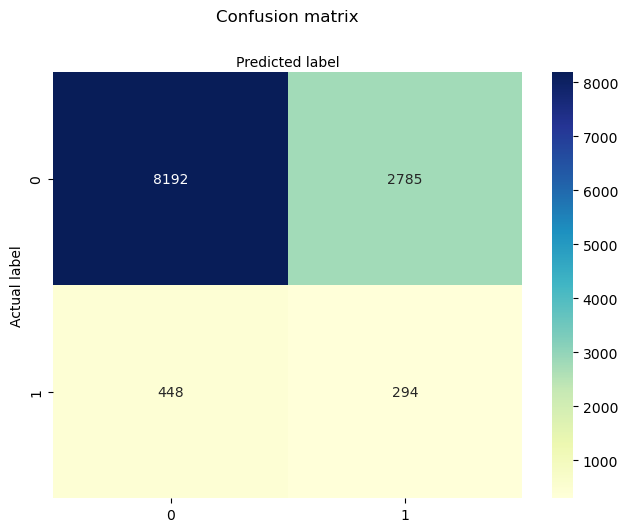

In [47]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))

# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))


Optimal threshold: 0.49


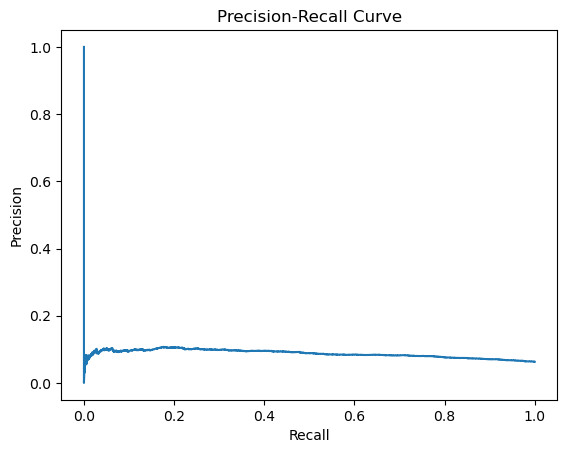

In [48]:
y_scores = logreg.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve, f1_score

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the F1 score for each threshold
f1_scores = [f1_score(y_test, (y_scores >= t).astype(int)) for t in thresholds]

# Find the threshold that maximizes the F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f'Optimal threshold: {optimal_threshold:.2f}')


# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Accuracy: 0.32
Recall: 0.85
Precision: 0.07
              precision    recall  f1-score   support

     refused       0.97      0.28      0.44     10977
    accepted       0.07      0.85      0.14       742

    accuracy                           0.32     11719
   macro avg       0.52      0.57      0.29     11719
weighted avg       0.91      0.32      0.42     11719



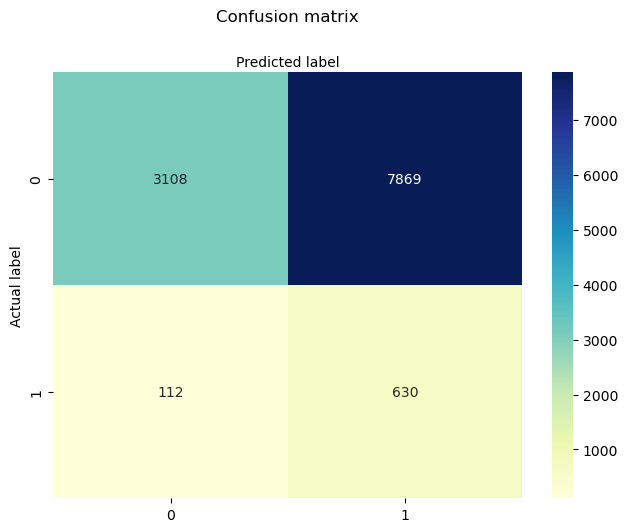

In [49]:
threshold = 0.12

predicted_proba = logreg.predict_proba(X_test)
y_pred = (predicted_proba [:,1] >= threshold).astype('int')

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))
# Evaluate the recall of the model
recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

# Evaluate the precision of the model
precision = precision_score(y_test, y_pred)
print("Precision: {:.2f}".format(precision))


# Calculate the confusion matrix of the model
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# Print the evaluation matrix
target_names = ['refused', 'accepted']
print(classification_report(y_test, y_pred, target_names=target_names))

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm


# Define the parameter grid to search
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object with the recall metric
grid_search = GridSearchCV(rf, param_grid, scoring='recall', cv=5)

# run the grid search with a progress bar
for result in tqdm(grid_search.fit(X_oversampled, y_oversampled).cv_results_):
    pass

# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best recall score: {:.2f}".format(grid_search.best_score_))


# Get the predicted classes for the test set
y_pred = grid_search.predict(X_test)

# Print the classification report for the test set
print(classification_report(y_test, y_pred))


100%|██████████| 17/17 [00:00<00:00, 58831.00it/s]


Best parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best recall score: 0.00
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     10977
         1.0       0.07      0.00      0.01       742

    accuracy                           0.93     11719
   macro avg       0.51      0.50      0.49     11719
weighted avg       0.88      0.93      0.91     11719



Best parameters:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Best recall score: 0.93

              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84     10977
         1.0       0.10      0.40      0.15       742

    accuracy                           0.72     11719
   macro avg       0.52      0.57      0.49     11719
weighted avg       0.89      0.72      0.79     11719


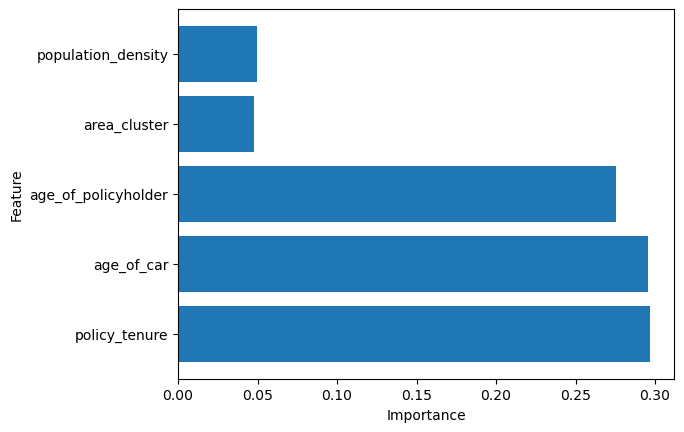

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = logreg.feature_importances_
features = X.columns

# Filter features based on threshold
threshold = 0.01
important_features = np.where(importances > threshold)[0]
importances = importances[important_features]
features = features[important_features]

plt.barh(range(len(important_features)), importances)
plt.yticks(range(len(important_features)), features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

